# Import Libraries and Load Data

In [93]:
# import libraries

import numpy as np # data processing (math/formulas)
import pandas as pd # data processing (dataframes)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

%matplotlib inline # graphs generated using plt are displayed in notebook (instead of separate window)
pd.set_option('display.max_info_rows', 5) # displays previews of dataframes (instead of all rows)

In [94]:
# load data

dataset_file_path = "../Rynd.Morgan/Downloads/kaggle_data.csv" # where file is located on computer
df = pd.read_csv(dataset_file_path) # define dataframe as file ''
print("Full train dataset shape is {}".format(df.shape)) # describe number of rows & columns in table

Full train dataset shape is (2919, 81)


# Inspect Data

In [95]:
# display preview of data

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [96]:
# inspect feature columns and their datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Id             int64  
 1   MSSubClass     int64  
 2   MSZoning       object 
 3   LotFrontage    float64
 4   LotArea        int64  
 5   Street         object 
 6   Alley          object 
 7   LotShape       object 
 8   LandContour    object 
 9   Utilities      object 
 10  LotConfig      object 
 11  LandSlope      object 
 12  Neighborhood   object 
 13  Condition1     object 
 14  Condition2     object 
 15  BldgType       object 
 16  HouseStyle     object 
 17  OverallQual    int64  
 18  OverallCond    int64  
 19  YearBuilt      int64  
 20  YearRemodAdd   int64  
 21  RoofStyle      object 
 22  RoofMatl       object 
 23  Exterior1st    object 
 24  Exterior2nd    object 
 25  MasVnrType     object 
 26  MasVnrArea     float64
 27  ExterQual      object 
 28  ExterCond      object 
 29  Foundation     objec

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

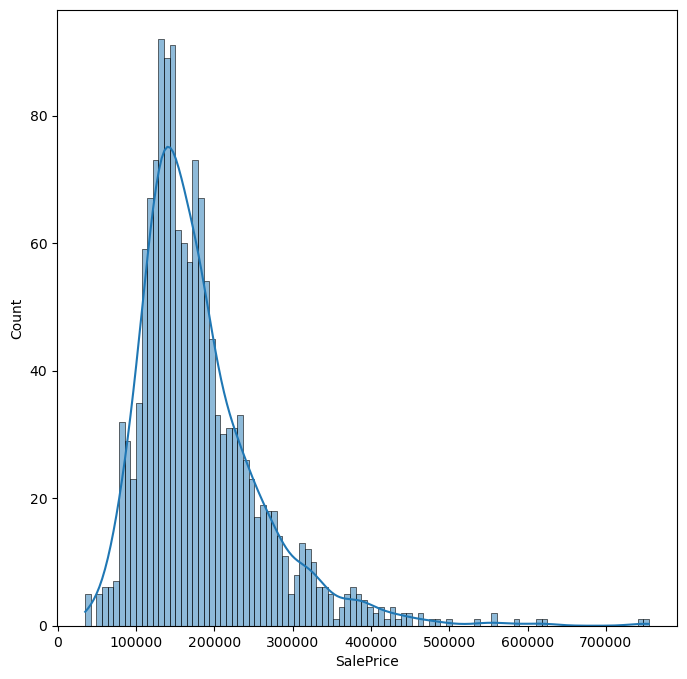

In [129]:
# study distribution of sale prices

print(df['SalePrice'].describe()) # print statistics about data
plt.figure(figsize=(8,8)) # create histogram (display)
sns.histplot(df['SalePrice'], bins=100, kde=True) # input data to histogram

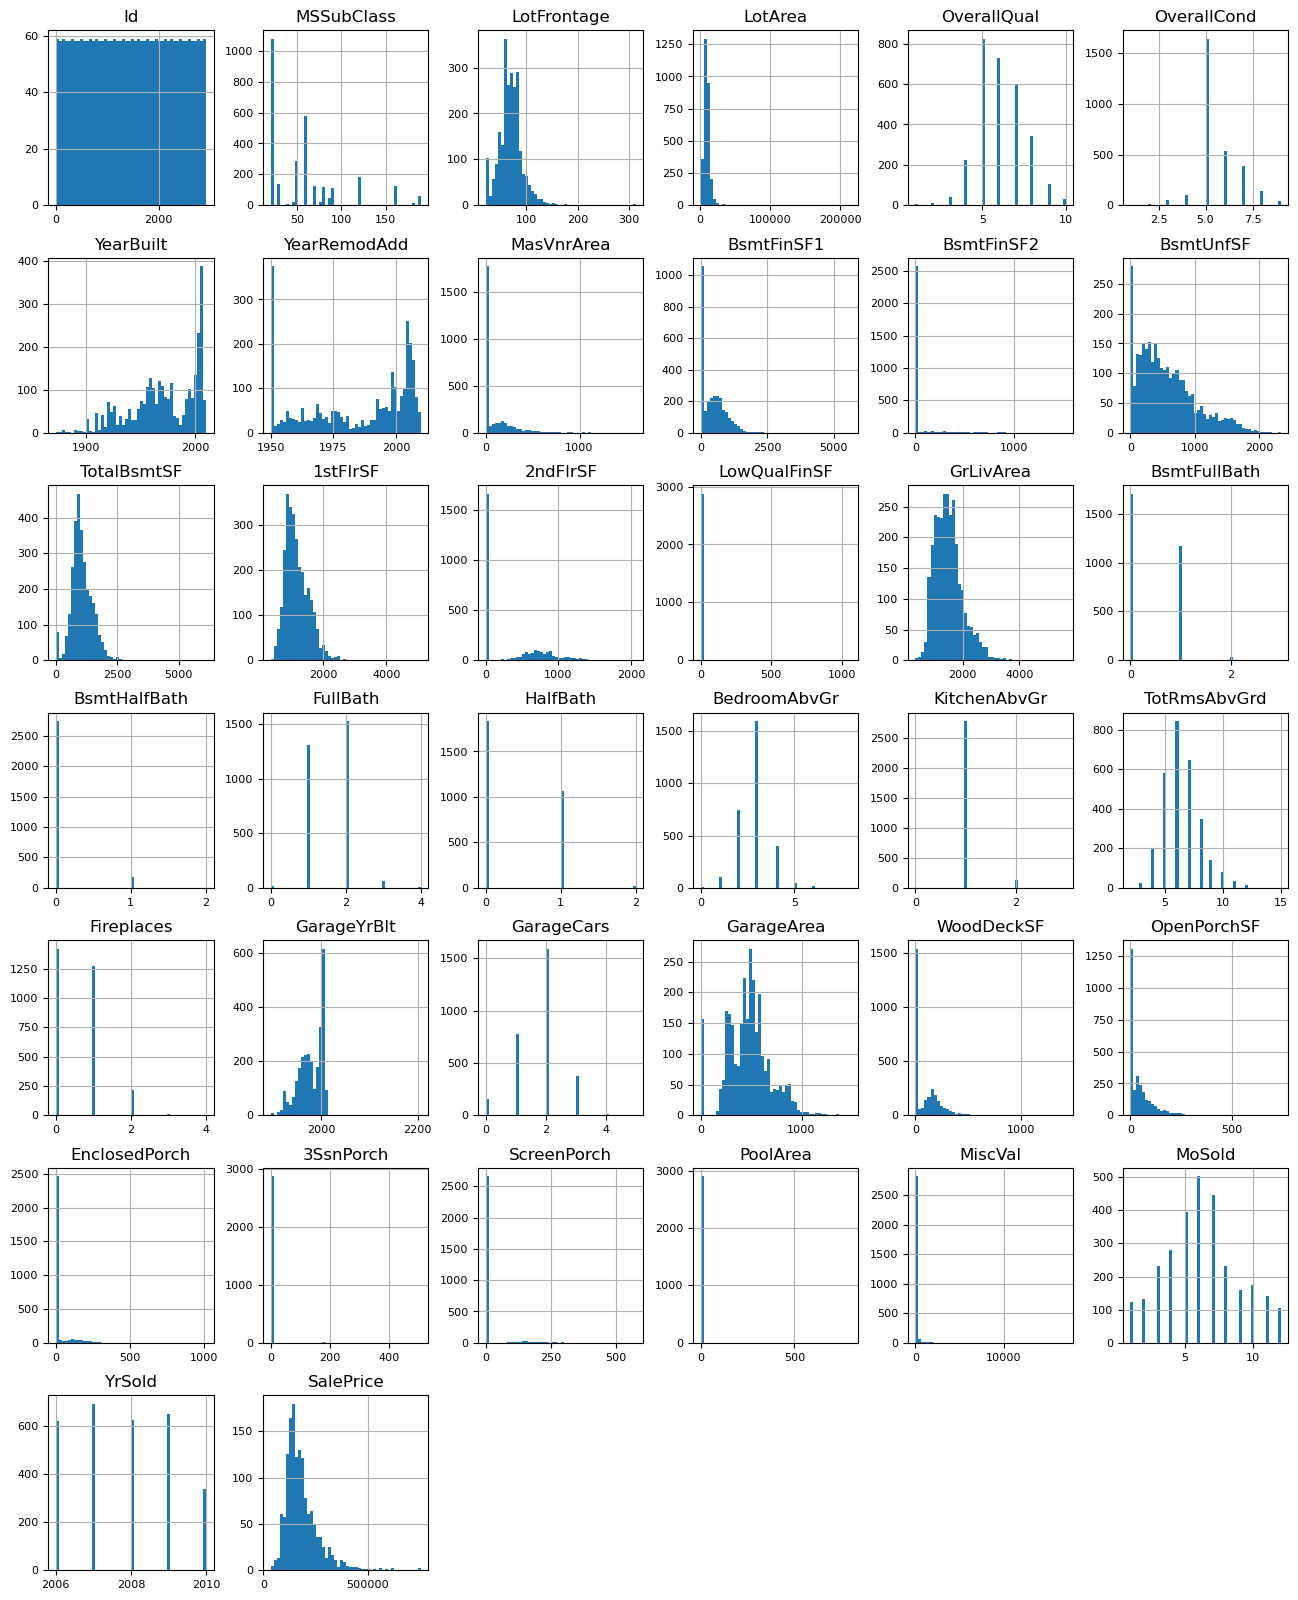

In [98]:
# plot distribution of all numerical features

df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Data Cleaning

In [99]:
# drop 'Id' column for training

df.drop(columns='Id', inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [100]:
# drop non-numerical columns

df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [101]:
# double-check that non-numerical columns were dropped
# new list of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 37 columns):
 #   Column         Dtype  
---  ------         -----  
 0   MSSubClass     int64  
 1   LotFrontage    float64
 2   LotArea        int64  
 3   OverallQual    int64  
 4   OverallCond    int64  
 5   YearBuilt      int64  
 6   YearRemodAdd   int64  
 7   MasVnrArea     float64
 8   BsmtFinSF1     float64
 9   BsmtFinSF2     float64
 10  BsmtUnfSF      float64
 11  TotalBsmtSF    float64
 12  1stFlrSF       int64  
 13  2ndFlrSF       int64  
 14  LowQualFinSF   int64  
 15  GrLivArea      int64  
 16  BsmtFullBath   float64
 17  BsmtHalfBath   float64
 18  FullBath       int64  
 19  HalfBath       int64  
 20  BedroomAbvGr   int64  
 21  KitchenAbvGr   int64  
 22  TotRmsAbvGrd   int64  
 23  Fireplaces     int64  
 24  GarageYrBlt    float64
 25  GarageCars     float64
 26  GarageArea     float64
 27  WoodDeckSF     int64  
 28  OpenPorchSF    int64  
 29  EnclosedPorch  int64

In [102]:
# I've worked with this data before, and know that some features are more predictive than others, and provide better results
# creating new df with predictive features only

predictive_features = ['OverallQual', 'GarageCars', 'TotalBsmtSF', 'GrLivArea', 'YearBuilt', '1stFlrSF', 'GarageArea', 'FullBath', 'GarageYrBlt', 'SalePrice']
df = df[predictive_features]
df.head()

,OverallQual,GarageCars,TotalBsmtSF,GrLivArea,YearBuilt,1stFlrSF,GarageArea,FullBath,GarageYrBlt,SalePrice
0,7,2.0,856.0,1710,2003,856,548.0,2,2003.0,208500.0
1,6,2.0,1262.0,1262,1976,1262,460.0,2,1976.0,181500.0
2,7,2.0,920.0,1786,2001,920,608.0,2,2001.0,223500.0
3,7,3.0,756.0,1717,1915,961,642.0,1,1998.0,140000.0
4,8,3.0,1145.0,2198,2000,1145,836.0,2,2000.0,250000.0


In [103]:
# double-checking that some columns were dropped -- should be fewer than 37 columns
df.shape

(2919, 10)

In [108]:
# filling null values

# /var/folders/n1/8y8t398x1qs5bnhdnrf48hq80000gp/T/ipykernel_3640/3418463648.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version.
    # Use obj.ffill() or obj.bfill() instead.
    # df.fillna(method ='ffill', inplace = True) < raised this error
    # method = 'ffill' (front-fill) also gave me issues, because it gave me 1459 homes with the same sale price (inaccurate)

df.dropna(axis =0, inplace = True)

In [109]:
# double-checking that null values were filled

def columns_with_nulls(df):
    return df.columns[df.isnull().any()].tolist()
print(columns_with_nulls(df))

[]


# Training the Model

In [113]:
# import function to split dataset
from sklearn.model_selection import train_test_split

# define variables
# X = predictive features (independent variables)
# y = target variable (dependent variable)

X = df[['TotalBsmtSF', 'GrLivArea', 'GrLivArea', '1stFlrSF', 'GarageArea', 'GarageYrBlt']]
y = df['SalePrice']

# perform function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [114]:
# import model
from sklearn.linear_model import LinearRegression

# initialize an instance of the model
lm = LinearRegression()

# fit the model (train the model)
lm.fit(X_train, y_train)

LinearRegression()

In [115]:
# look at coefficients
lm.coef_ # (when you run this in a separate cell it returns coefficients)
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)

                   Coef
TotalBsmtSF   34.128781
GrLivArea     75.561464
YearBuilt    619.811548
1stFlrSF       2.627024
GarageArea    56.585750
GarageYrBlt  152.294727


In [116]:
# get predictions
predictions = lm.predict(X_test)
predictions

array([226248.46997196, 214204.0543011 , 136526.14784702,  91481.14295336,
       299640.41132779, 206365.48676745, 179740.54039762, 160187.65799227,
       152697.43103131, 207131.46600437, 115663.15408397, 180861.77240689,
        19487.74617178, 183774.97277336, 225074.23653916, 254227.05585238,
       233934.67574635, 190333.66611995, 275982.61167536, 157370.16416681,
       202728.72334774, 315589.76739499, 139271.30939791, 214098.83811099,
       145903.52785677, 207525.69491805, 222249.22963594, 141179.4832695 ,
       302474.08932792, 268968.32680043, 146170.18855631, 120978.80103046,
       199036.55717333, 124522.78021335, 135251.07398562, 125430.69236319,
       220039.015877  , 224395.0563475 ,  81315.9146241 , 122814.34314458,
       102909.41358498, 185505.70883771, 160936.40778329, 184558.8716143 ,
       146921.32938235, 306099.93105639, 147811.61071255, 230266.6238032 ,
       224896.40420578, 214591.18807707, 243793.32698602, 216630.2477041 ,
       217378.16214937, 1

Text(0.5, 1.0, 'Model Evaluation')

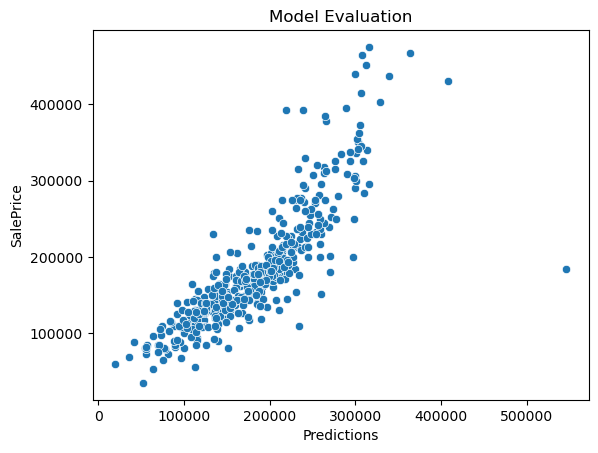

In [117]:
# plot predictions in a scatterplot
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("Predictions")
plt.title("Model Evaluation")

Text(0.5, 1.0, 'Model Evaluation')

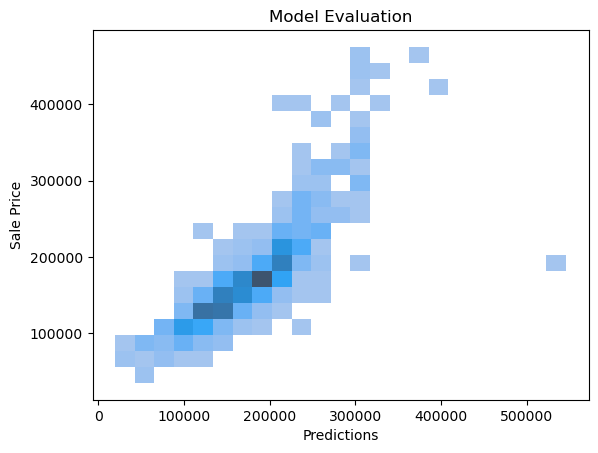

In [131]:
# plot predictions in a histogram
sns.histplot(x=predictions, y=y_test, kde=True)
plt.xlabel("Predictions")
plt.ylabel("Sale Price")
plt.title("Model Evaluation")

# Analysis of Model Output

In [118]:
# plot predictions in a table (dataframe)
data = {'Sale Price': y_test,
        'Predictions': predictions}
result_df = pd.DataFrame(data)
result_df.sort_index(ascending=True, inplace=True)
result_df

,Sale Price,Predictions
4,250000.0,277144.484111
5,143000.0,175598.053156
6,307000.0,250738.687699
7,200000.0,226822.071803
9,118000.0,104201.521560
...,...,...
1437,394617.0,288640.486594
1442,310000.0,262849.936864
1445,129000.0,111820.259478
1448,112000.0,102909.413585


In [119]:
# describe statistics of house prices, std should be similar to train data (79442.502883)
print(result_df['Sale Price'].describe())

count       438.000000
mean     182687.376712
std       76120.502993
min       34900.000000
25%      132500.000000
50%      168750.000000
75%      213430.000000
max      475000.000000
Name: Sale Price, dtype: float64


In [120]:
# mode of sale price
result_df['Sale Price'].mode()

0    140000.0
1    155000.0
Name: Sale Price, dtype: float64

In [122]:
# highlight areas where difference between x-y is greater than, let's say $76120.502993
prediction_differnce = {'Sale Price': y_test,
                   'Predictions': predictions,
                   'Difference': np.absolute((y_test)-(predictions))}
prediction_differnce_df = pd.DataFrame(data=prediction_differnce)
prediction_differnce_df.sort_index(ascending=True, inplace=True)
prediction_differnce_df

,Sale Price,Predictions,Difference
4,250000.0,277144.484111,27144.484111
5,143000.0,175598.053156,32598.053156
6,307000.0,250738.687699,56261.312301
7,200000.0,226822.071803,26822.071803
9,118000.0,104201.521560,13798.478440
...,...,...,...
1437,394617.0,288640.486594,105976.513406
1442,310000.0,262849.936864,47150.063136
1445,129000.0,111820.259478,17179.740522
1448,112000.0,102909.413585,9090.586415


In [128]:
# locate predictions where difference is > std ($76120.502993)
prediction_differnce_df.to_csv('../Rynd.Morgan/Downloads/prediction_differnce_df.csv')

In [132]:
# create df for test_data here
test_file_path = "../Rynd.Morgan/Downloads/test.csv" # where file is located on computer
test_df = pd.read_csv(test_file_path) # define dataframe as file ''
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [133]:
# join test_data on prediction_difference_df
analysis_df = pd.merge(test_df, prediction_differnce_df, left_index=True, right_index=True)
analysis_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Sale Price,Predictions,Difference
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,1,2010,WD,Normal,250000.0,277144.484111,27144.484111
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,143000.0,175598.053156,32598.053156
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,GdPrv,Shed,500,3,2010,WD,Normal,307000.0,250738.687699,56261.312301
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,5,2010,WD,Normal,200000.0,226822.071803,26822.071803
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,4,2010,WD,Normal,118000.0,104201.521560,13798.478440


In [137]:
# filter to bad predictions
analysis_df.to_csv('../Rynd.Morgan/Downloads/analysis_df.csv')

In [ ]:
# this is a data hygiene issue.
# when I filled NaN values, it automatically filled all NaN sale prices with $147,500
# (because this was the final non-NaN sale price in the dataframe)

In [ ]:
# go back to old features (more predictive)
# investigate why model is giving incorrect predictions for $150,000 houses -- used df.fillna(method=ffill)
# which caused half the dataset to have sale prices of $147,500